## Importing the Libraries

In [1]:
from keras.datasets import mnist
from keras.layers import Input, Reshape, Flatten, Dense
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import sys
%matplotlib inline

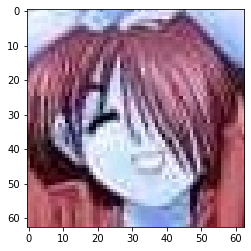

In [2]:
path = 'D:/Sonu/MINE/Mmmm..Personal/Datasets/Anime Face Generation using GANs/images'
dataset = []
for item in os.listdir(path):
    img = cv2.imread(os.path.join(path, item))
    imgplot = plt.imshow(img)
    break

## Loading in the Data

In [3]:
path = 'D:/Sonu/MINE/Mmmm..Personal/Datasets/Anime Face Generation using GANs/images'
dataset = []
for item in os.listdir(path):
    img = cv2.imread(os.path.join(path, item))
    img = cv2.resize(img, (64, 64))
    dataset.append(img)
print(len(dataset))
print(len(dataset[0]))

63565
64


In [4]:
img_rows = 64
img_cols = 64
channels = 3
img_shape = (img_rows, img_cols, channels)

In [5]:
def build_generator():
    
    noise_shape = (12288,)
    
    model = Sequential()
    model.add(Dense(256, input_shape = noise_shape))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(BatchNormalization(momentum = 0.8))
    
    model.add(Dense(512))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(BatchNormalization(momentum = 0.8))
    
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(BatchNormalization(momentum = 0.8))
    
    model.add(Dense(np.prod(img_shape), activation = 'tanh'))
    model.add(Reshape(img_shape))
    
    model.summary()
    
    noise = Input(shape = noise_shape)
    generated_img = model(noise)
    
    return Model(noise, generated_img)

In [6]:
def build_discriminator():
    
    model = Sequential()
    
    model.add(Flatten(input_shape = img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Dense(1, activation = 'sigmoid'))
    model.summary()
    
    img = Input(shape = img_shape)
    validity = model(img)
    
    return Model(img, validity)

In [7]:
def scale(x):
    return (x-127.5)/127.5

def train(epochs, batch_size = 128, save_interval = 500):
    
#     (X_train, _), (_, _) = mnist.load_data()
    data = tuple(dataset)
#     X_train = (data - 127.5) / 127.5    #Rescaling to -1 to 1.......-255/255 if between [0,1]
    scaled_data = map(scale, data)
#     X_train = np.expand_dims(scaled_data, axis = 3)
    half_batch = int(batch_size / 2)
    
    for epoch in range(epochs):
        
        #Training the Discriminator
        
#         idx = np.random.randint(0, np.array(scaled_data).shape[0], half_batch)
        idx = np.random.randint(0, 63565, half_batch)
        imgs = np.array(list(scaled_data))[idx]
        noise = np.random.normal(0, 1, (half_batch, 12288))
        
        gen_imgs = generator.predict(noise)
        
        d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
        
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        
        #Training the Generator
        
        noise = np.random.normal(0, 1, (batch_size, 12288))
        valid_y = np.array([1]*batch_size)
        g_loss = combined.train_on_batch(noise, valid_y)
        
        
        # Progress
        
        print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
        if epoch%save_interval == 0:
            save_imgs(epoch)

        
def save_imgs(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r*c, 12288))
    gen_imgs = generator.predict(noise)
    
    # Rescale images 0-1
    gen_imgs = 0.5*gen_imgs + 0.5
    
    fig, axs = plt.subplots(r, c)
    cnt = 0
    
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :, :, 0], cmap = 'gray')
            axs[i,j].axis('off')
            cnt+=1
    fig.savefig("Uwu_images/mnist_%d.png" % epoch)
    plt.close()

In [8]:
# temp=map(scale,dataset[0])
# list(temp)

In [10]:
optimizer = Adam(0.0002, 0.5)

discriminator = build_discriminator()
discriminator.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

generator = build_generator()
generator.compile(loss = 'binary_crossentropy', optimizer = optimizer)

z = Input(shape = (12288,))
img = generator(z)

discriminator.trainable = False

valid = discriminator(img)


combined = Model(z, valid)
combined.compile(loss = 'binary_crossentropy', optimizer = optimizer)

train(epochs = 10000, batch_size = 32, save_interval = 1000)

generator.save('Anime_uwu.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 12288)             0         
                                                                 
 dense_7 (Dense)             (None, 512)               6291968   
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 6,423,553
Trainable params: 6,423,553
No

IndexError: index 15390 is out of bounds for axis 0 with size 0